In [3]:
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns
import re
from konlpy.tag import Kkma
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import sklearn
import pickle as pickle


In [4]:
pred = pd.read_csv('../code/prediction/dev_train_14.csv')
labels = pd.read_csv('../data/dataset/train/dev_type.csv')
labels.id=labels.index
labels.head()

,Unnamed: 0,id,sentence,subject_entity,object_entity,label,source
0,8004,0,"2012년 4월 17일, 레알 마드리드 CF와의 UEFA 챔피언스리그 4강전에서 카...","{'word': '레알 마드리드 CF', 'start_idx': 14, 'end_i...","{'word': '2012', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
1,30420,1,한승재 DB금융투자 연구원은 “S-Oil의 1분기 영업이익은 –4752억원으로 대규...,"{'word': 'DB금융투자', 'start_idx': 4, 'end_idx': ...","{'word': '12월', 'start_idx': 70, 'end_idx': 72...",no_relation,wikitree
2,6074,2,"이후 가자 지구는 2007년 하마스의 통치 하에 들어가게 되었으며, 이스라엘은 20...","{'word': '이스라엘', 'start_idx': 38, 'end_idx': 4...","{'word': '2007년', 'start_idx': 10, 'end_idx': ...",no_relation,wikipedia
3,7822,3,2012년부터 요미우리 자이언츠의 오사카 주재 스카우트로 부임했다.,"{'word': '요미우리 자이언츠', 'start_idx': 8, 'end_idx...","{'word': '2012', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia
4,2769,4,1997년 그와 함께 뉴욕 메츠에 입단했으나 부상으로 1999년에 방출된 이후 여러...,"{'word': '뉴욕 메츠', 'start_idx': 12, 'end_idx': ...","{'word': '1999년', 'start_idx': 30, 'end_idx': ...",no_relation,wikipedia


In [5]:
pred.shape, labels.shape

((240, 3), (240, 7))

In [6]:
def whatType(string):
    dic = eval(string)
    return dic['type']
def whatIsWord(string):
    dic = eval(string)
    return dic['word']
def when_start(ob_entity,sub_entity):
    ob_idx = eval(ob_entity)['start_idx']
    sub_idx = eval(sub_entity)['start_idx']
    if ob_idx >sub_idx:
        return 0
    return 1



def label_to_num(label):
  num_label = []
  with open('../code/dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [7]:

labels.id=labels.index
labels['object_type'] = labels.object_entity.apply(lambda x: whatType(x))
labels['subject_type'] = labels.subject_entity.apply(lambda x: whatType(x))
labels['fast']= labels.id.apply(lambda x: when_start(labels['object_entity'].loc[x],labels['subject_entity'].loc[x]))


In [8]:


def label_to_num(label):
  num_label = []
  with open('../code/dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [9]:
# compare.shape

NameError: name 'compare' is not defined

<Axes: xlabel='label'>

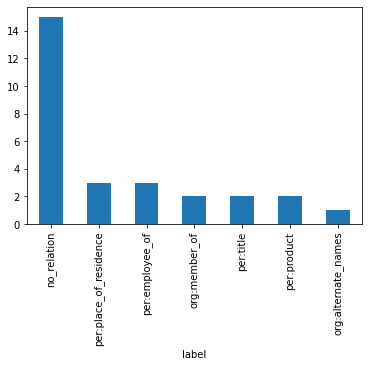

In [10]:
compare = pd.concat([labels[['id','label','subject_type','object_type','fast']],pred.pred_label],axis=1)

compare[compare.label!=compare.pred_label]['label'].value_counts().plot(kind= 'bar')

<Axes: xlabel='pred_label'>

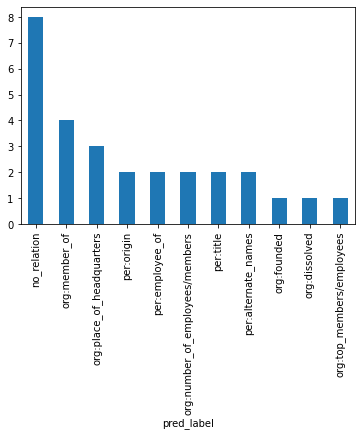

In [11]:
compare[compare.label!=compare.pred_label]['pred_label'].value_counts().plot(kind= 'bar')


<Axes: xlabel='label'>

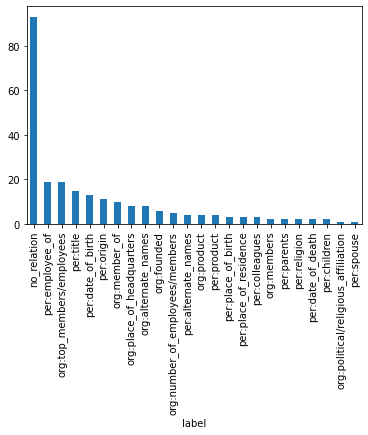

In [12]:
compare['label'].value_counts().plot(kind= 'bar')


<Axes: xlabel='label'>

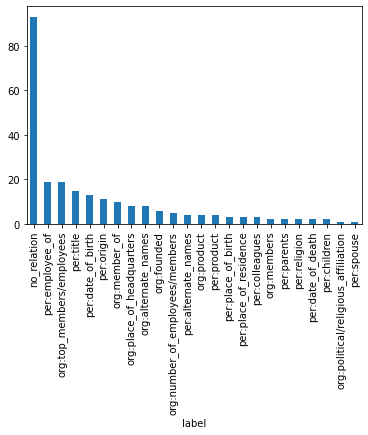

In [13]:
compare.label.value_counts().plot(kind='bar')


<Axes: xlabel='label'>

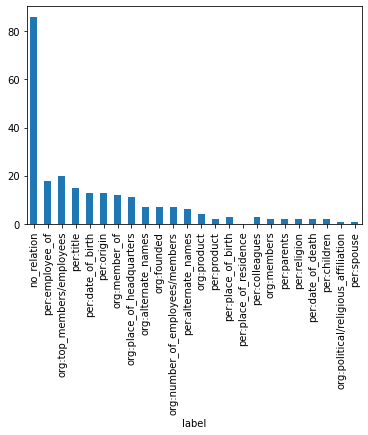

In [14]:
compare.pred_label.value_counts().reindex(compare.label.value_counts().index).plot(kind='bar')


<Axes: xlabel='label'>

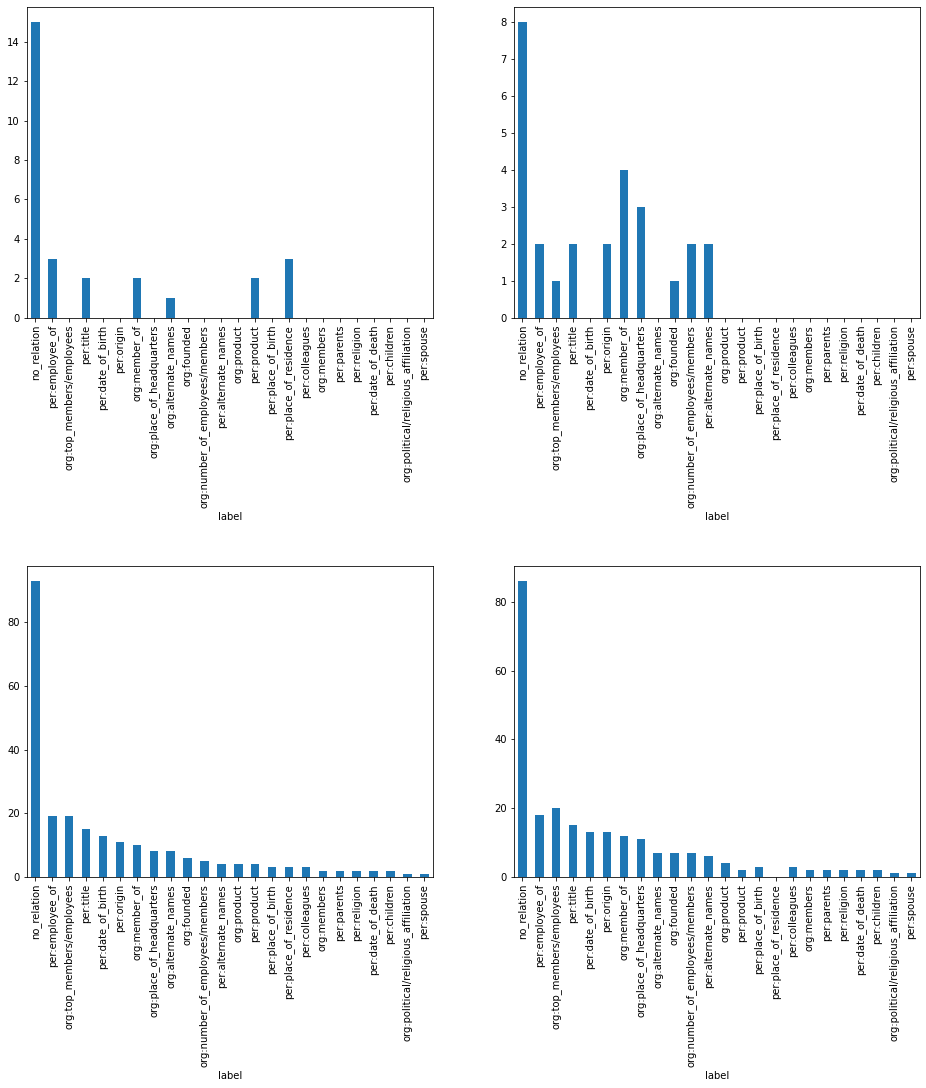

In [15]:
fig ,axes = plt.subplots(2,2,figsize= (16,16))
plt.subplots_adjust(wspace=0.2, hspace=0.8)
axes= axes.flatten()
indx = compare['label'].value_counts().index
compare[compare.label!=compare.pred_label]['label'].value_counts().reindex(indx).plot(kind= 'bar',ax=axes[0])
compare[compare.label!=compare.pred_label]['pred_label'].value_counts().reindex(indx).plot(kind= 'bar',ax=axes[1])
compare['label'].value_counts().plot(kind= 'bar',ax=axes[2])
compare['pred_label'].value_counts().reindex(indx).plot(kind= 'bar',ax=axes[3])


In [16]:
# x= pd.crosstab(compare[compare.label!=compare.pred_label]['label'],compare[compare.label!=compare.pred_label]['pred_label'])
# x.to_csv('./분석6.csv')

In [17]:
x

NameError: name 'x' is not defined

In [31]:
def klue_re_micro_f1(preds, labels):
    """KLUE-RE micro f1 (except no_relation)"""
    label_list = ['no_relation', 'org:top_members/employees', 'org:members',
       'org:product', 'per:title', 'org:alternate_names',
       'per:employee_of', 'org:place_of_headquarters', 'per:product',
       'org:number_of_employees/members', 'per:children',
       'per:place_of_residence', 'per:alternate_names',
       'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings',
       'per:spouse', 'org:founded', 'org:political/religious_affiliation',
       'org:member_of', 'per:parents', 'org:dissolved',
       'per:schools_attended', 'per:date_of_death', 'per:date_of_birth',
       'per:place_of_birth', 'per:place_of_death', 'org:founded_by',
       'per:religion']
    no_relation_label_idx = label_list.index("no_relation")
    preds = label_to_num(preds.values)
    labels = label_to_num(labels.values)

    label_indices = list(range(len(label_list)))
    label_indices.remove(no_relation_label_idx)
    return sklearn.metrics.f1_score(labels, preds, average="micro", labels=label_indices) * 100.0


def label_to_num(label):
  num_label = []
  with open('../code/dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

In [32]:
import pathlib
file = pathlib.Path("../code/results/train_num6_LOC_ORG")
if file.exists ():
    print ("File exist")
else:
    print ("File not exist")


File not exist


In [33]:
compare

,id,label,subject_type,object_type,fast,pred_label
0,0,no_relation,ORG,DAT,1,no_relation
1,1,no_relation,ORG,DAT,0,no_relation
2,2,no_relation,ORG,DAT,1,no_relation
3,3,no_relation,ORG,DAT,1,no_relation
4,4,no_relation,ORG,DAT,0,no_relation
...,...,...,...,...,...,...
235,235,per:title,PER,POH,0,no_relation
236,236,per:title,PER,POH,1,per:title
237,237,per:title,PER,POH,0,per:title
238,238,per:title,PER,POH,0,per:title


In [34]:
klue_re_micro_f1(compare.pred_label, compare.label)

89.03654485049834

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def label_to_num(label):
  num_label = []
  with open('../code/dict_label_to_num.pkl', 'rb') as f:
    dict_label_to_num = pickle.load(f)
  for v in label:
    num_label.append(dict_label_to_num[v])
  
  return num_label

label_list = ['no_relation', 'org:top_members/employees', 'org:members',
            'org:product', 'per:title', 'org:alternate_names',
            'per:employee_of', 'org:place_of_headquarters', 'per:product',
            'org:number_of_employees/members', 'per:children',
            'per:place_of_residence', 'per:alternate_names',
            'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings',
            'per:spouse', 'org:founded', 'org:political/religious_affiliation',
            'org:member_of', 'per:parents', 'org:dissolved',
            'per:schools_attended', 'per:date_of_death', 'per:date_of_birth',
            'per:place_of_birth', 'per:place_of_death', 'org:founded_by',
            'per:religion']
x= compare[compare.label != compare.pred_label]
val_labels = x['label']
val_nums = label_to_num(val_labels)  # 정답 str 라벨값으로 변환

pred_labels = x['pred_label']
pred_nums = label_to_num(pred_labels)

val_nums_arr = np.array(val_nums)
pred_answer_arr = np.array(pred_nums)

cm = confusion_matrix(val_nums_arr, pred_answer_arr)
cm_a = confusion_matrix(val_nums_arr, val_nums_arr)

In [36]:
print(cm)

[[0 1 2 0 1 2 0 2 0 2 0 1 3 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


ValueError: The number of FixedLocator locations (14), usually from a call to set_ticks, does not match the number of labels (30).

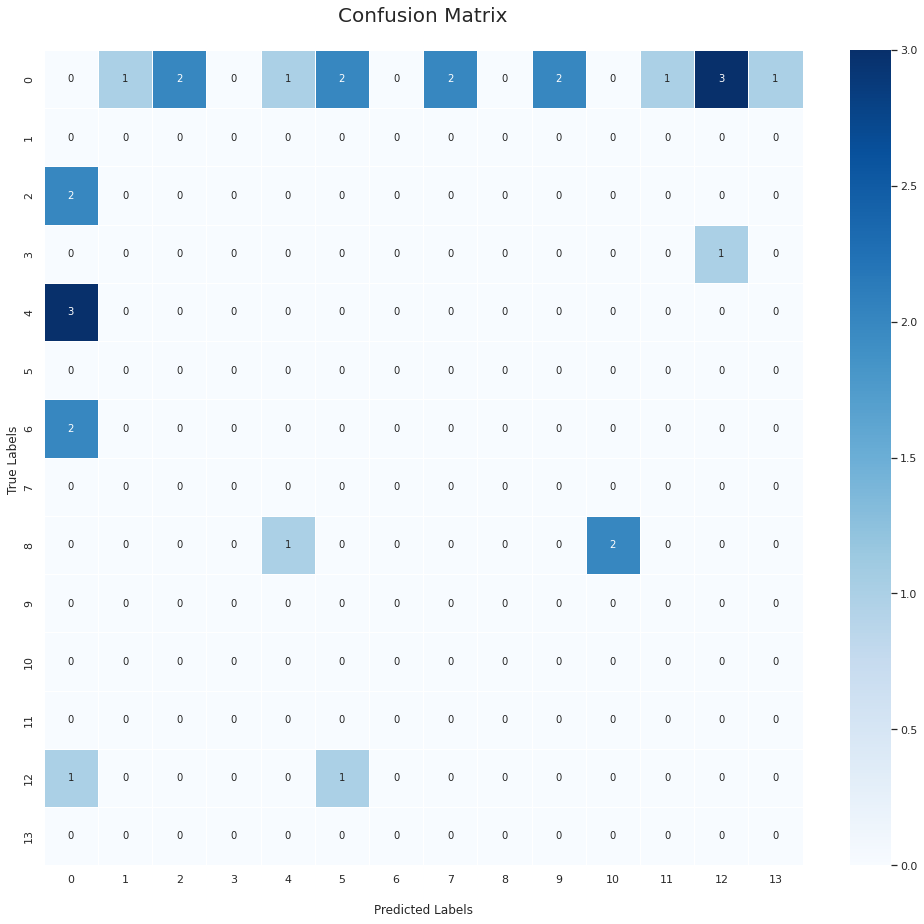

In [41]:
sns.set(rc={'figure.figsize':(17, 15)})

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt="d",
                linewidths=.5, 
                annot_kws={"size": 10})
ax.set_title('Confusion Matrix\n',fontsize=20)
ax.set_xlabel('\nPredicted Labels')
ax.set_ylabel('True Labels ')

ax.yaxis.set_ticklabels(label_list, rotation=0, ha="right")
ax.xaxis.set_ticklabels(label_list, rotation=90, ha="right")
plt.show()

In [39]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_a = cm_a.astype('float') / cm.sum(axis=1)[:, np.newaxis]


# plot
sns.set(rc={'figure.figsize':(17, 15)})

ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f",
                linewidths=.5, 
                annot_kws={"size": 10},
                vmin = 0.0, vmax = 1.0)
ax.set_title('Confusion Matrix\n',fontsize=20)
ax.set_xlabel('\nPredicted Labels')
ax.set_ylabel('True Labels ')
# ax.set_xlim(0, 1)
ax.yaxis.set_ticklabels(label_list, rotation=0, ha="right")
ax.xaxis.set_ticklabels(label_list, rotation=90, ha="right",)
plt.show()

ValueError: operands could not be broadcast together with shapes (7,7) (14,1) 